In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter

In [2]:
# Sample text
text = "We are learning Natural Language Processing with PyTorch and it is fun and educational"

In [3]:

# Preprocess text
def preprocess(text):
    text = text.lower().split()
    vocab = set(text)
    word_to_ix = {word: i for i, word in enumerate(vocab)}
    ix_to_word = {i: word for i, word in enumerate(vocab)}
    return text, word_to_ix, ix_to_word

text, word_to_ix, ix_to_word = preprocess(text)
vocab_size = len(word_to_ix)
context_size = 2

In [4]:
# Generate context-target pairs
def create_context_target_pairs(text, context_size):
    data = []
    for i in range(context_size, len(text) - context_size):
        context = [text[i - j - 1] for j in range(context_size)] + [text[i + j + 1] for j in range(context_size)]
        target = text[i]
        data.append((context, target))
    return data

data = create_context_target_pairs(text, context_size)

In [5]:

# CBOW Model
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_dim)
        self.linear1 = nn.Linear(embed_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
    
    def forward(self, inputs):
        embeds = self.embeddings(inputs).mean(dim=0)
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out


In [6]:

# Hyperparameters
embed_dim = 10
learning_rate = 0.01
num_epochs = 100

In [7]:
# Create model, loss function, and optimizer
model = CBOW(vocab_size, embed_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [8]:

# Training the model
for epoch in range(num_epochs):
    total_loss = 0
    for context, target in data:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        target_idx = torch.tensor([word_to_ix[target]], dtype=torch.long)

        # Zero gradients
        model.zero_grad()

        # Forward pass
        log_probs = model(context_idxs)

        # Compute loss
        loss = loss_function(log_probs.unsqueeze(0), target_idx)
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(data)}")


Epoch 10/100, Loss: 2.287494349479675
Epoch 20/100, Loss: 1.9513681054115295
Epoch 30/100, Loss: 1.6318183183670043
Epoch 40/100, Loss: 1.33165442943573
Epoch 50/100, Loss: 1.0637806475162506
Epoch 60/100, Loss: 0.841306284070015
Epoch 70/100, Loss: 0.6641230314970017
Epoch 80/100, Loss: 0.5275406777858734
Epoch 90/100, Loss: 0.4236122652888298
Epoch 100/100, Loss: 0.34481196105480194


In [9]:

# Test the model
context = ["learning", "we", "with", "pytorch"]
context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
log_probs = model(context_idxs)
predicted_word_idx = torch.argmax(log_probs).item()
print(f"Predicted word: {ix_to_word[predicted_word_idx]}")

Predicted word: language


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter

# Sample text
text = "We are learning Natural Language Processing with PyTorch and it is fun and educational"

# Preprocess text
def preprocess(text):
    text = text.lower().split()
    vocab = set(text)
    word_to_ix = {word: i for i, word in enumerate(vocab)}
    ix_to_word = {i: word for i, word in enumerate(vocab)}
    return text, word_to_ix, ix_to_word

text, word_to_ix, ix_to_word = preprocess(text)
vocab_size = len(word_to_ix)
context_size = 2

# Generate context-target pairs
def create_context_target_pairs(text, context_size):
    data = []
    for i in range(context_size, len(text) - context_size):
        context = [text[i - j - 1] for j in range(context_size)] + [text[i + j + 1] for j in range(context_size)]
        target = text[i]
        data.append((context, target))
    return data

data = create_context_target_pairs(text, context_size)

# CBOW Model using only Linear layers
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        self.embed = nn.Linear(vocab_size, embed_dim, bias=False)
        self.linear1 = nn.Linear(embed_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
    
    def forward(self, inputs):
        # Create one-hot encodings for the inputs
        one_hot = torch.zeros(inputs.shape[0], vocab_size)
        one_hot.scatter_(1, inputs.unsqueeze(1), 1)
        
        # Get the embeddings using the linear layer
        embeds = self.embed(one_hot).mean(dim=0)
        
        # Forward pass through the rest of the network
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out

# Hyperparameters
embed_dim = 10
learning_rate = 0.01
num_epochs = 100

# Create model, loss function, and optimizer
model = CBOW(vocab_size, embed_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    total_loss = 0
    for context, target in data:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        target_idx = torch.tensor([word_to_ix[target]], dtype=torch.long)

        # Zero gradients
        model.zero_grad()

        # Forward pass
        log_probs = model(context_idxs)

        # Compute loss
        loss = loss_function(log_probs.unsqueeze(0), target_idx)
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(data)}")

# Test the model
context = ["learning", "we", "with", "pytorch"]
context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
log_probs = model(context_idxs)
predicted_word_idx = torch.argmax(log_probs).item()
print(f"Predicted word: {ix_to_word[predicted_word_idx]}")


Epoch 10/100, Loss: 2.5148014783859254
Epoch 20/100, Loss: 2.458785343170166
Epoch 30/100, Loss: 2.4160749435424806
Epoch 40/100, Loss: 2.3804602146148683
Epoch 50/100, Loss: 2.348517417907715
Epoch 60/100, Loss: 2.3175462007522585
Epoch 70/100, Loss: 2.285392427444458
Epoch 80/100, Loss: 2.2499183893203734
Epoch 90/100, Loss: 2.2093894481658936
Epoch 100/100, Loss: 2.1620692014694214
Predicted word: and


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Sample text
text = """
Once upon a time in a quaint little village nestled between rolling hills and meandering streams, there lived a kind-hearted baker named Amelia. Her bakery, adorned with colorful flowers and the aroma of freshly baked bread, was the heart of the village.

Amelia was known far and wide for her delicious pastries and warm smile. Every morning, she woke up before the crack of dawn to knead dough, mix batter, and prepare treats for the villagers. From flaky croissants to decadent cakes, her creations brought joy to everyone who tasted them.

But Amelia's kindness extended beyond her bakery. She had a special place in her heart for those in need. Whenever someone was feeling down or going through a rough patch, she would offer a listening ear and a comforting slice of pie.

One chilly winter evening, as snowflakes danced in the air, a weary traveler stumbled upon the village. With nowhere else to go, he found his way to Amelia's bakery, drawn by the warm glow of the oven and the promise of respite.

Amelia welcomed the traveler with open arms, offering him a seat by the fire and a steaming cup of hot cocoa. As they sat together, the traveler shared tales of his adventures and the hardships he had faced along the way.

Moved by his story, Amelia offered him a place to stay for the night, free of charge. She filled his belly with hearty stew and wrapped him in blankets to keep him warm. In the morning, she sent him off with a care package of freshly baked bread and pastries for his journey ahead.

Months passed, and the traveler returned to the village, not as a weary wanderer, but as a successful merchant. Grateful for Amelia's kindness, he presented her with exotic spices and rare ingredients from his travels, knowing they would inspire new creations in her bakery.

From that day forward, the village prospered, and Amelia's bakery became known as a place of generosity and goodwill. People from far and wide would travel to taste her treats and experience her warmth.

And so, in a village where kindness was the currency and compassion the language, Amelia's story became a beacon of hope and a reminder that even the smallest act of kindness can change the world.

"""

# Preprocess text
def preprocess(text):
    text = text.lower().split()
    vocab = set(text)
    word_to_ix = {word: i for i, word in enumerate(vocab)}
    ix_to_word = {i: word for i, word in enumerate(vocab)}
    return text, word_to_ix, ix_to_word

text, word_to_ix, ix_to_word = preprocess(text)
vocab_size = len(word_to_ix)
context_size = 2

# Generate context-target pairs
def create_context_target_pairs(text, context_size):
    data = []
    for i in range(context_size, len(text) - context_size):
        context = [text[i - j - 1] for j in range(context_size)] + [text[i - j + 1] for j in range(context_size)]
        target = text[i]
        data.append((context, target))
    return data

data = create_context_target_pairs(text, context_size)

# CBOW Model using only Linear layers
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        self.embed = nn.Linear(vocab_size, embed_dim, bias=False)
        self.linear1 = nn.Linear(embed_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
    
    def forward(self, inputs):
        # Create one-hot encodings for the inputs
        one_hot = torch.zeros(inputs.shape[0], vocab_size)
        one_hot.scatter_(1, inputs.unsqueeze(1), 1)
        
        # Get the embeddings using the linear layer
        embeds = self.embed(one_hot).mean(dim=0)
        
        # Forward pass through the rest of the network
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out

# Hyperparameters
embed_dim = 10
learning_rate = 0.01
num_epochs = 100

# Create model, loss function, and optimizer
model = CBOW(vocab_size, embed_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    total_loss = 0
    for context, target in data:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        target_idx = torch.tensor([word_to_ix[target]], dtype=torch.long)

        # Zero gradients
        model.zero_grad()

        # Forward pass
        log_probs = model(context_idxs)

        # Compute loss
        loss = loss_function(log_probs.unsqueeze(0), target_idx)
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(data)}")

# Extract embedding weights

plt.show()


Epoch 10/100, Loss: 4.906256073697576
Epoch 20/100, Loss: 4.861603546268393
Epoch 30/100, Loss: 4.723002354828223
Epoch 40/100, Loss: 4.482808462390799
Epoch 50/100, Loss: 4.2170164150266976
Epoch 60/100, Loss: 3.9226716035746017
Epoch 70/100, Loss: 3.5956756279934052
Epoch 80/100, Loss: 3.2422749515337808
Epoch 90/100, Loss: 2.885597153397223
Epoch 100/100, Loss: 2.527777996336879


In [12]:
data

[(['upon', 'once', 'time', 'a'], 'a'),
 (['a', 'upon', 'in', 'time'], 'time'),
 (['time', 'a', 'a', 'in'], 'in'),
 (['in', 'time', 'quaint', 'a'], 'a'),
 (['a', 'in', 'little', 'quaint'], 'quaint'),
 (['quaint', 'a', 'village', 'little'], 'little'),
 (['little', 'quaint', 'nestled', 'village'], 'village'),
 (['village', 'little', 'between', 'nestled'], 'nestled'),
 (['nestled', 'village', 'rolling', 'between'], 'between'),
 (['between', 'nestled', 'hills', 'rolling'], 'rolling'),
 (['rolling', 'between', 'and', 'hills'], 'hills'),
 (['hills', 'rolling', 'meandering', 'and'], 'and'),
 (['and', 'hills', 'streams,', 'meandering'], 'meandering'),
 (['meandering', 'and', 'there', 'streams,'], 'streams,'),
 (['streams,', 'meandering', 'lived', 'there'], 'there'),
 (['there', 'streams,', 'a', 'lived'], 'lived'),
 (['lived', 'there', 'kind-hearted', 'a'], 'a'),
 (['a', 'lived', 'baker', 'kind-hearted'], 'kind-hearted'),
 (['kind-hearted', 'a', 'named', 'baker'], 'baker'),
 (['baker', 'kind-hea

In [13]:

# Test the model
context = ["months", "and", "snowflakes"]
context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
log_probs = model(context_idxs)
predicted_word_idx = torch.argmax(log_probs).item()
print(f"Predicted word: {ix_to_word[predicted_word_idx]}")

Predicted word: and


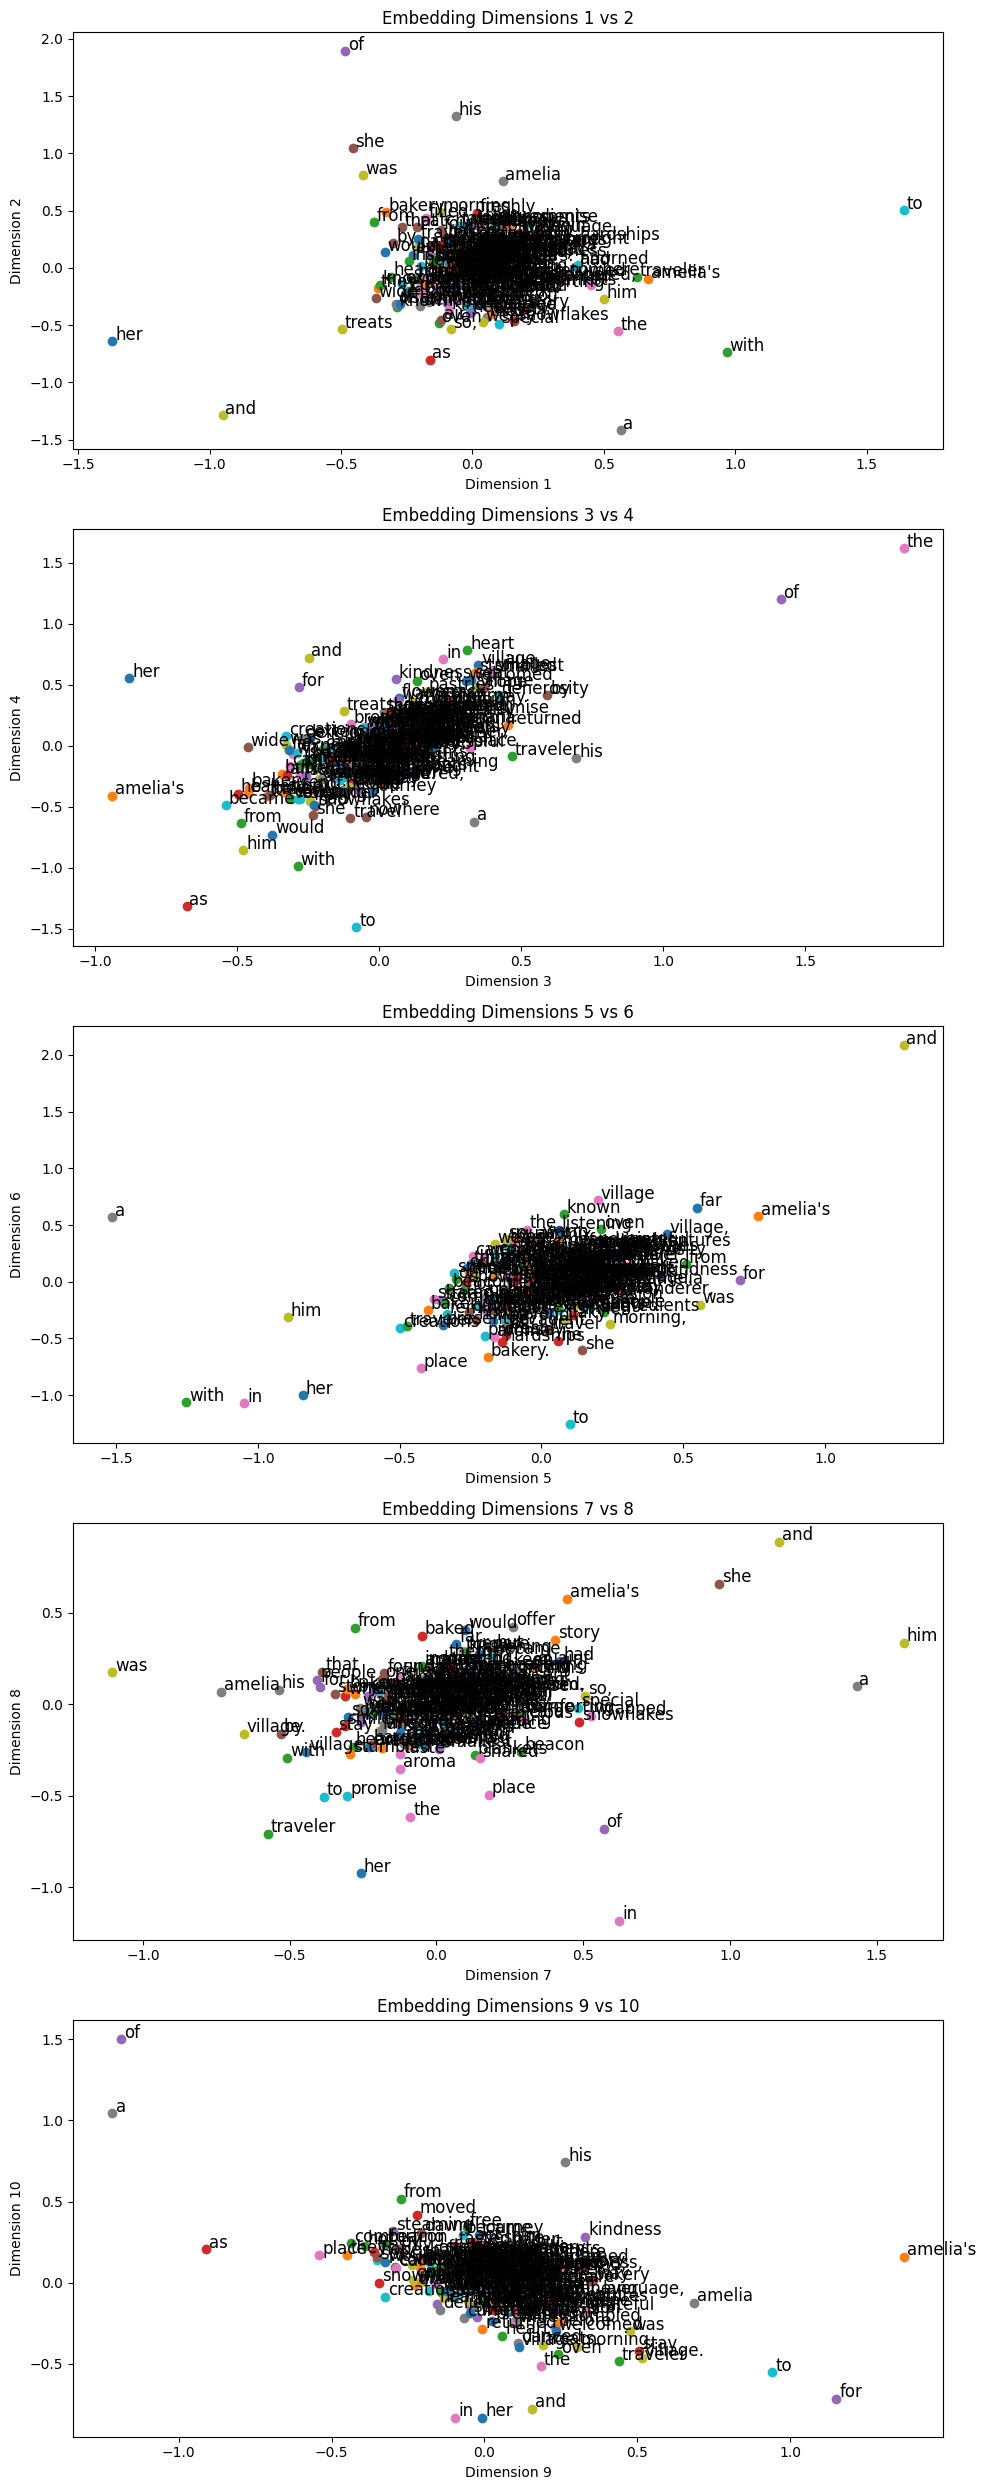

In [14]:
embedding_weights = model.embed.weight.detach().numpy().T  # Transpose to match (vocab_size, embed_dim)

# Plot the embeddings for selected pairs of dimensions
fig, axes = plt.subplots(5, 1, figsize=(10, 25))
pairs = [(i, i+1) for i in range(0, embed_dim, 2)]

for ax, (dim1, dim2) in zip(axes, pairs):
    for i, word in ix_to_word.items():
        ax.scatter(embedding_weights[i, dim1], embedding_weights[i, dim2])
        ax.text(embedding_weights[i, dim1] + 0.01, embedding_weights[i, dim2] + 0.01, word, fontsize=12)
    ax.set_xlabel(f'Dimension {dim1+1}')
    ax.set_ylabel(f'Dimension {dim2+1}')
    ax.set_title(f'Embedding Dimensions {dim1+1} vs {dim2+1}')

plt.tight_layout()

In [15]:
log_probs

tensor([ -3.8992,  -3.7857,  -2.1567,  -5.5353,   6.3958,  -1.8467,   5.5754,
          2.1902,   0.8143, -11.9717,  -0.1044,   3.6633,   1.2452,   3.4727,
          6.0887,  -4.5989,  -2.2649,   3.1905,   0.6817,  -6.3969,   5.8939,
         -6.4879,  -4.9642,  -5.2579,   1.6762,  -3.9276,   1.8950,   0.2147,
          1.3509,   6.2230,   1.8108,   1.2459,  -6.6723,  -7.3919,  -1.0525,
         -8.2597,  -4.2898,  -6.6894,  -0.6931,  -1.1628,   0.7201,   2.1192,
          2.1471,  -5.8615,  -0.3338,   7.5497,  -4.1727,  -6.0568,  -7.1142,
         -0.9850,  -2.9831,   3.7318,  -6.2946,   2.9233,   3.0250,   1.5515,
          5.9470,  -4.9239,  -0.1097,   7.2966,  -0.8771,  -2.0667,  -4.0298,
         -6.9673, -14.3118,  -5.2576,  -6.4065,  -4.5001,  -1.5906,  -2.5098,
         -5.7146,   2.4449,   1.7107,   0.5494,   1.9544,  -0.0614,  -3.0592,
          1.3619,   4.6898,   0.0438,   5.9031,   1.6409,   1.1508,  -1.0150,
          0.4303,   3.7438,   1.9085,   3.4830,   4.7482,   1.79

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Sample text
text = """
Once upon a time in a quaint little village nestled between rolling hills and meandering streams, there lived a kind-hearted baker named Amelia. Her bakery, adorned with colorful flowers and the aroma of freshly baked bread, was the heart of the village.

Amelia was known far and wide for her delicious pastries and warm smile. Every morning, she woke up before the crack of dawn to knead dough, mix batter, and prepare treats for the villagers. From flaky croissants to decadent cakes, her creations brought joy to everyone who tasted them.

But Amelia's kindness extended beyond her bakery. She had a special place in her heart for those in need. Whenever someone was feeling down or going through a rough patch, she would offer a listening ear and a comforting slice of pie.

One chilly winter evening, as snowflakes danced in the air, a weary traveler stumbled upon the village. With nowhere else to go, he found his way to Amelia's bakery, drawn by the warm glow of the oven and the promise of respite.

Amelia welcomed the traveler with open arms, offering him a seat by the fire and a steaming cup of hot cocoa. As they sat together, the traveler shared tales of his adventures and the hardships he had faced along the way.

Moved by his story, Amelia offered him a place to stay for the night, free of charge. She filled his belly with hearty stew and wrapped him in blankets to keep him warm. In the morning, she sent him off with a care package of freshly baked bread and pastries for his journey ahead.

Months passed, and the traveler returned to the village, not as a weary wanderer, but as a successful merchant. Grateful for Amelia's kindness, he presented her with exotic spices and rare ingredients from his travels, knowing they would inspire new creations in her bakery.

From that day forward, the village prospered, and Amelia's bakery became known as a place of generosity and goodwill. People from far and wide would travel to taste her treats and experience her warmth.

And so, in a village where kindness was the currency and compassion the language, Amelia's story became a beacon of hope and a reminder that even the smallest act of kindness can change the world.
"""

# Preprocess text
def preprocess(text):
    text = text.lower().split()
    vocab = sorted(set(text))
    word_to_ix = {word: i for i, word in enumerate(vocab)}
    ix_to_word = {i: word for i, word in enumerate(vocab)}
    return text, word_to_ix, ix_to_word

text, word_to_ix, ix_to_word = preprocess(text)
vocab_size = len(word_to_ix)
context_size = 5

# Generate context-target pairs for Skip-gram
def create_skipgram_pairs(text, window_size):
    pairs = []
    for i in range(window_size, len(text) - window_size):
        target = text[i]
        context = [text[i - j] for j in range(1, window_size + 1)] + [text[i + j] for j in range(1, window_size + 1)]
        pairs.extend([(target, context_word) for context_word in context])
    return pairs

pairs = create_skipgram_pairs(text, context_size)

# Skip-gram Model using only Linear layers
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(SkipGram, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_size)
    
    def forward(self, inputs):
        # Get the embeddings using the embedding layer
        embeds = self.embed(inputs)
        
        # Forward pass through the rest of the network
        out = self.linear(embeds)
        return out

# Hyperparameters
embed_dim = 10
learning_rate = 0.01
num_epochs = 100

# Convert pairs to PyTorch tensors
def pairs_to_tensor(pairs, word_to_ix):
    inputs = torch.tensor([word_to_ix[pair[0]] for pair in pairs], dtype=torch.long)
    targets = torch.tensor([word_to_ix[pair[1]] for pair in pairs], dtype=torch.long)
    return inputs, targets

inputs, targets = pairs_to_tensor(pairs, word_to_ix)

model = SkipGram(vocab_size, embed_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    total_loss = 0
    
    # Shuffle inputs and targets
    perm = torch.randperm(len(inputs))
    inputs_shuffled = inputs[perm]
    targets_shuffled = targets[perm]
    
    for i in range(len(inputs)):
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        log_probs = model(inputs_shuffled[i].unsqueeze(0))

        # Compute loss
        loss = loss_function(log_probs, targets_shuffled[i].unsqueeze(0))
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(inputs)}")

# Extract embedding weights
embedding_weights = model.embed.weight.detach().numpy()  # No need for transpose

# Plot the embeddings for selected pairs of dimensions
plt.figure(figsize=(10, 10))
for i, word in ix_to_word.items():
    plt.scatter(embedding_weights[i, 0], embedding_weights[i, 1])
    plt.annotate(word, xy=(embedding_weights[i, 0], embedding_weights[i, 1]))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings')
plt.grid(True)
plt.show()

Epoch 10/100, Loss: 4.660998310735973
Epoch 20/100, Loss: 4.483556078586118
Epoch 30/100, Loss: 4.302831655053606


KeyboardInterrupt: 

In [ ]:
# Function to find nearest neighbors
def find_nearest_neighbors(word, k=4):
    """
    Find the k nearest neighbors of a given word in the embedding space.
    """
    word_idx = word_to_ix[word]
    word_embedding = embedding_weights[word_idx]
    
    # Compute cosine similarity between the word and all other words
    similarities = np.dot(embedding_weights, word_embedding) / (np.linalg.norm(embedding_weights, axis=1) * np.linalg.norm(word_embedding))
    
    # Get the indices of the k most similar words
    nearest_indices = np.argsort(-similarities)[1:k+1]
    
    # Get the nearest neighbor words
    nearest_neighbors = [ix_to_word[idx] for idx in nearest_indices]
    
    return nearest_neighbors

# Example usage
word = "amelia"
neighbors = find_nearest_neighbors(word)
print(f"Nearest neighbors of '{word}': {neighbors}")

Nearest neighbors of 'amelia': ['with', 'story,', 'moved', 'bread']


Epoch 10/100, Loss: 4.558869096585995
Epoch 20/100, Loss: 4.311253312843343
Epoch 30/100, Loss: 4.144069781778368
Epoch 40/100, Loss: 4.00339903408078
Epoch 50/100, Loss: 3.874469044011667
Epoch 60/100, Loss: 3.7549323352105026
Epoch 70/100, Loss: 3.64320681791943
Epoch 80/100, Loss: 3.542243068449463
Epoch 90/100, Loss: 3.4499999888993185
Epoch 100/100, Loss: 3.3673579493637633


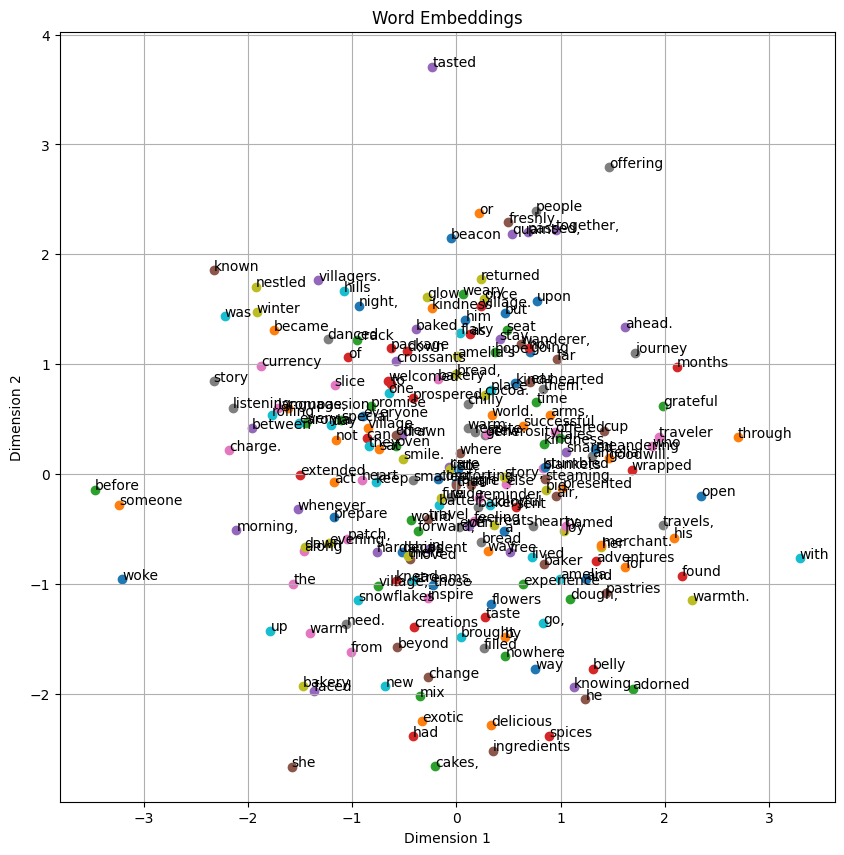

Predicted words: ['amelia', 'of', 'the', 'the']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Sample text
text = """
Once upon a time in a quaint little village nestled between rolling hills and meandering streams, there lived a kind-hearted baker named Amelia. Her bakery, adorned with colorful flowers and the aroma of freshly baked bread, was the heart of the village.

Amelia was known far and wide for her delicious pastries and warm smile. Every morning, she woke up before the crack of dawn to knead dough, mix batter, and prepare treats for the villagers. From flaky croissants to decadent cakes, her creations brought joy to everyone who tasted them.

But Amelia's kindness extended beyond her bakery. She had a special place in her heart for those in need. Whenever someone was feeling down or going through a rough patch, she would offer a listening ear and a comforting slice of pie.

One chilly winter evening, as snowflakes danced in the air, a weary traveler stumbled upon the village. With nowhere else to go, he found his way to Amelia's bakery, drawn by the warm glow of the oven and the promise of respite.

Amelia welcomed the traveler with open arms, offering him a seat by the fire and a steaming cup of hot cocoa. As they sat together, the traveler shared tales of his adventures and the hardships he had faced along the way.

Moved by his story, Amelia offered him a place to stay for the night, free of charge. She filled his belly with hearty stew and wrapped him in blankets to keep him warm. In the morning, she sent him off with a care package of freshly baked bread and pastries for his journey ahead.

Months passed, and the traveler returned to the village, not as a weary wanderer, but as a successful merchant. Grateful for Amelia's kindness, he presented her with exotic spices and rare ingredients from his travels, knowing they would inspire new creations in her bakery.

From that day forward, the village prospered, and Amelia's bakery became known as a place of generosity and goodwill. People from far and wide would travel to taste her treats and experience her warmth.

And so, in a village where kindness was the currency and compassion the language, Amelia's story became a beacon of hope and a reminder that even the smallest act of kindness can change the world.
"""

# Preprocess text
def preprocess(text):
    text = text.lower().split()
    vocab = sorted(set(text))
    word_to_ix = {word: i for i, word in enumerate(vocab)}
    ix_to_word = {i: word for i, word in enumerate(vocab)}
    return text, word_to_ix, ix_to_word

text, word_to_ix, ix_to_word = preprocess(text)
vocab_size = len(word_to_ix)
context_size = 2

# Generate context-target pairs for Skip-gram
def create_skipgram_pairs(text, window_size):
    pairs = []
    for i in range(len(text)):
        target = text[i]
        context = [text[i - j - 1] for j in range(window_size) if i - j - 1 >= 0] + \
                  [text[i + j + 1] for j in range(window_size) if i + j + 1 < len(text)]
        pairs.extend([(target, context_word) for context_word in context])
    return pairs

pairs = create_skipgram_pairs(text, context_size)

# Skip-gram Model using only Linear layers
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(SkipGram, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_size)
    
    def forward(self, inputs):
        # Get the embeddings using the embedding layer
        embeds = self.embed(inputs)
        
        # Forward pass through the rest of the network
        out = self.linear(embeds)
        return out

# Hyperparameters
embed_dim = 10
learning_rate = 0.01
num_epochs = 100

# Convert pairs to PyTorch tensors
def pairs_to_tensor(pairs, word_to_ix):
    inputs = torch.tensor([word_to_ix[pair[0]] for pair in pairs], dtype=torch.long)
    targets = torch.tensor([word_to_ix[pair[1]] for pair in pairs], dtype=torch.long)
    return inputs, targets

inputs, targets = pairs_to_tensor(pairs, word_to_ix)

model = SkipGram(vocab_size, embed_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    total_loss = 0
    
    # Shuffle inputs and targets
    perm = torch.randperm(len(inputs))
    inputs_shuffled = inputs[perm]
    targets_shuffled = targets[perm]
    
    for i in range(len(inputs)):
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        log_probs = model(inputs_shuffled[i].unsqueeze(0))

        # Compute loss
        loss = loss_function(log_probs, targets_shuffled[i].unsqueeze(0))
        total_loss += loss.item()

        # Backward pass and update weights
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(inputs)}")

# Extract embedding weights
embedding_weights = model.embed.weight.detach().numpy()  # No need for transpose

# Plot the embeddings for selected pairs of dimensions
plt.figure(figsize=(10, 10))
for i, word in ix_to_word.items():
    plt.scatter(embedding_weights[i, 0], embedding_weights[i, 1])
    plt.annotate(word, xy=(embedding_weights[i, 0], embedding_weights[i, 1]))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings')
plt.grid(True)
plt.show()

# Predict the next 3 continuous words
def predict_next_words(model, start_word, word_to_ix, ix_to_word, num_predictions=3):
    model.eval()
    words = [start_word]
    input_word = torch.tensor([word_to_ix[start_word]], dtype=torch.long)

    for _ in range(num_predictions):
        with torch.no_grad():
            log_probs = model(input_word)
            _, predicted_ix = torch.max(log_probs, 1)
            predicted_word = ix_to_word[predicted_ix.item()]
            words.append(predicted_word)
            input_word = torch.tensor([predicted_ix.item()], dtype=torch.long)
    
    return words

# Example prediction
start_word = "amelia"
predicted_words = predict_next_words(model, start_word, word_to_ix, ix_to_word)
print("Predicted words:", predicted_words)


In [ ]:
start_word = "woke"
predicted_words = predict_next_words(model, start_word, word_to_ix, ix_to_word)
print("Predicted words:", predicted_words)


Predicted words: ['woke', 'up', 'morning,', 'she']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming we have embeddings for 'king', 'queen', 'man', 'woman'
king = np.array([0.5, 0.1, -0.2, 0.3])
queen = np.array([0.4, 0.2, -0.1, 0.3])
man = np.array([0.1, -0.3, 0.4, -0.5])
woman = np.array([0.2, -0.2, 0.3, -0.4])

# Vector arithmetic
king_minus_man = king - man
queen_minus_woman = queen - woman

# Check similarity
cosine_similarity([king_minus_man], [queen_minus_woman])


array([[0.98183139]])